<a href="https://colab.research.google.com/github/manola1109/Deep-Learning-Projects/blob/main/Dropout_in_Neural_Networks_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Dropout

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding dropout layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model using Dropout</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/My\ Drive/Dataset.zip

Archive:  /content/drive/My Drive/Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg

In [4]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [5]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [6]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [7]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [8]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [9]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(np.float64(0.0), np.float64(1.0))

## 3. Creating training and validation set

In [10]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [11]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### <ol>Adding dropout layer(s)</ol>

In [12]:
# importing the dropout layer
from keras.layers import Dropout

In [13]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


## 5. Compiling the model

In [15]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [16]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model using Dropout

In [26]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.5740 - loss: 0.6827 - val_accuracy: 0.5609 - val_loss: 0.6586
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5741 - loss: 0.6909 - val_accuracy: 0.5609 - val_loss: 0.6592
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5801 - loss: 0.6698 - val_accuracy: 0.5609 - val_loss: 0.6578
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5538 - loss: 0.6990 - val_accuracy: 0.5609 - val_loss: 0.6587
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5705 - loss: 0.6986 - val_accuracy: 0.5609 - val_loss: 0.6573
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5524 - loss: 0.6865 - val_accuracy: 0.5609 - val_loss: 0.6572
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5795 - loss: 0.6873 - val_accuracy: 0.5609 - val_loss: 0.6560
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5846 - loss: 0.6892 - val_accuracy: 

## 7. Evaluating model performance

In [27]:
# Accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy on validation set: 0.6869688385269122


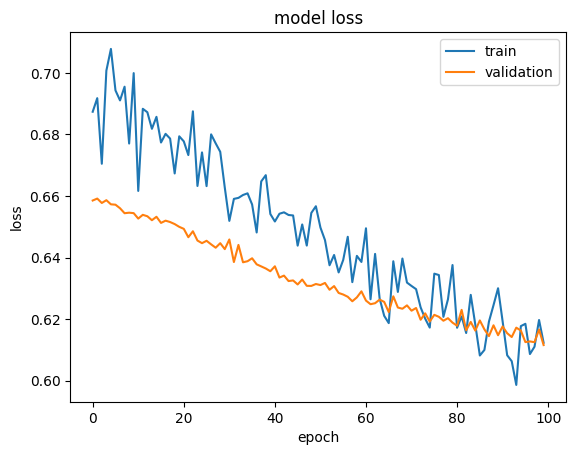

In [28]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

![alt text](https://drive.google.com/uc?id=1pEBFo1GkfKsvWtKTKinqYVSxOGy1M4ie)